In [1]:
import random
import os

<h1> Step 1: Split the dataset into training and testing sets</h1>

In [2]:
angry_files = []
angry_test = []
for filename in os.listdir("data_folder/angry/"):
    f = os.path.join("./data_folder/angry/", filename)
    if os.path.isfile:
        angry_files.append(f)
angry_training=random.sample(angry_files, k=70)
for file in angry_files:
    if file not in angry_training:
        angry_test.append(file)

fear_files = []
fear_test = []
for filename in os.listdir("data_folder/fear/"):
    f = os.path.join("./data_folder/fear/", filename)
    if os.path.isfile:
        fear_files.append(f)
fear_training=random.sample(fear_files, k=70)
for file in fear_files:
    if file not in fear_training:
        fear_test.append(file)

happy_files = []
happy_test = []
for filename in os.listdir("data_folder/happy/"):
    f = os.path.join("./data_folder/happy/", filename)
    if os.path.isfile:
        happy_files.append(f)
happy_training=random.sample(happy_files, k=70)
for file in happy_files:
    if file not in happy_training:
        happy_test.append(file)

sad_files = []
sad_test = []
for filename in os.listdir("data_folder/sad/"):
    f = os.path.join("./data_folder/sad/", filename)
    if os.path.isfile:
        sad_files.append(f)
sad_training=random.sample(sad_files, k=70)
for file in sad_files:
    if file not in sad_training:
        sad_test.append(file)


<h1>Step 2: Exploratory Data Analysis</h1>

In [3]:
import pandas as pd
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# label distribution of dataset
df_angry_training = pd.DataFrame(angry_training, columns=["Track"])
df_angry_test = pd.DataFrame(angry_test, columns=["Track"])

df_fear_training = pd.DataFrame(fear_training, columns=["Track"])
df_fear_test = pd.DataFrame(fear_test, columns=["Track"])

df_happy_training = pd.DataFrame(happy_training, columns=["Track"])
df_happy_test = pd.DataFrame(happy_test, columns=["Track"])

df_sad_training = pd.DataFrame(sad_training, columns=["Track"])
df_sad_test = pd.DataFrame(sad_test, columns=["Track"])

df_happy_training.head()

,Track
0,./data_folder/happy/YAF_shall_happy.wav
1,./data_folder/happy/YAF_puff_happy.wav
2,./data_folder/happy/YAF_page_happy.wav
3,./data_folder/happy/YAF_pole_happy.wav
4,./data_folder/happy/YAF_name_happy.wav


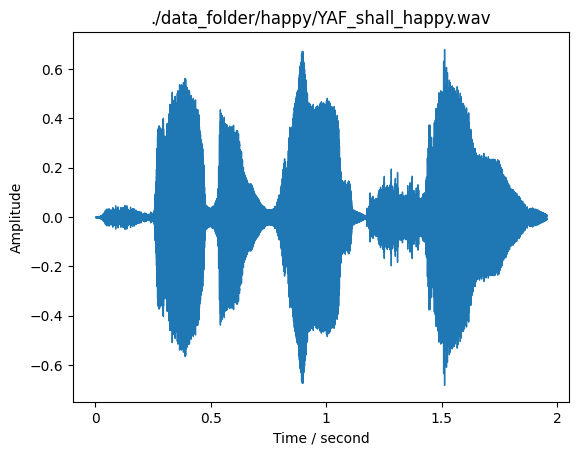

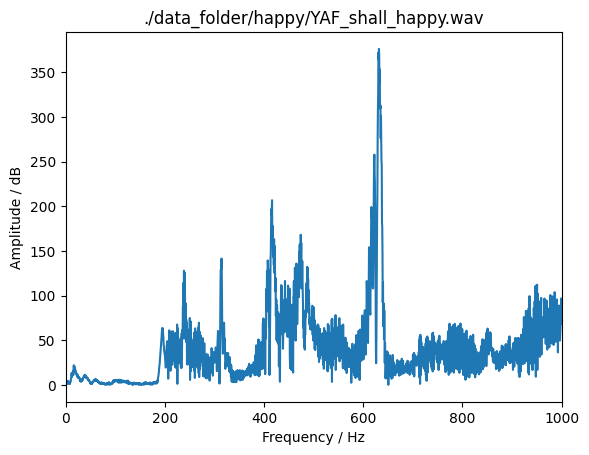

In [5]:
# plot audio in time and frequency domain
signal,sample_rate = librosa.load(happy_training[0])

# plot audio files in time domain
plt.figure(1)
librosa.display.waveshow(y=signal, sr=sample_rate)
plt.xlabel('Time / second')
plt.ylabel('Amplitude')
plt.title(happy_training[0])
plt.show()

# plot audio files in frequency domain
k = np.arange(len(signal))
T = len(signal)/sample_rate
freq = k/T

DATA_0 = np.fft.fft(signal)
abs_DATA_0 = abs(DATA_0)
plt.figure(2)
plt.plot(freq, abs_DATA_0)
plt.xlabel("Frequency / Hz")
plt.ylabel("Amplitude / dB")
plt.title(happy_training[0])
plt.xlim([0, 1000])
plt.show()

<h1>3: Acoustic Feature Extraction</h1>

In [6]:
from helpers import *

In [7]:
# audio feature extraction: loudness
df_angry_test = getLoudness(df_angry_test, angry_test)
df_angry_training = getLoudness(df_angry_training, angry_training)

df_fear_test = getLoudness(df_fear_test, fear_test)
df_fear_training = getLoudness(df_fear_training, fear_training)

df_happy_test = getLoudness(df_happy_test, happy_test)
df_happy_training = getLoudness(df_happy_training, happy_training)

df_sad_test = getLoudness(df_sad_test, sad_test)
df_sad_training = getLoudness(df_sad_training, sad_training)

In [8]:
# audio feature extraction: mel-frequency cepstral coefficients
df_angry_test = getMelFreq(df_angry_test, angry_test)
df_angry_training = getMelFreq(df_angry_training, angry_training)

df_fear_test = getMelFreq(df_fear_test, fear_test)
df_fear_training = getMelFreq(df_fear_training, fear_training)

df_happy_test = getMelFreq(df_happy_test, happy_test)
df_happy_training = getMelFreq(df_happy_training, happy_training)

df_sad_test = getMelFreq(df_sad_test, sad_test)
df_sad_training = getMelFreq(df_sad_training, sad_training)

In [9]:
# audio feature extraction: zero crossing rate
df_angry_test = getZCR(df_angry_test, angry_test)
df_angry_training = getZCR(df_angry_training, angry_training)

df_fear_test = getZCR(df_fear_test, fear_test)
df_fear_training = getZCR(df_fear_training, fear_training)

df_happy_test = getZCR(df_happy_test, happy_test)
df_happy_training = getZCR(df_happy_training, happy_training)

df_sad_test = getZCR(df_sad_test, sad_test)
df_sad_training = getZCR(df_sad_training, sad_training)

In [10]:
# audio feature extraction: chroma -> how much energy of each pitch class is in the signal
df_angry_test = getChroma(df_angry_test, angry_test)
df_angry_training = getChroma(df_angry_training, angry_training)

df_fear_test = getChroma(df_fear_test, fear_test)
df_fear_training = getChroma(df_fear_training, fear_training)

df_happy_test = getChroma(df_happy_test, happy_test)
df_happy_training = getChroma(df_happy_training, happy_training)

df_sad_test = getChroma(df_sad_test, sad_test)
df_sad_training = getChroma(df_sad_training, sad_training)

In [11]:
# audio feature extraction: mel spectrogram -> display pitch in a more regularized distribution
df_angry_test = getMelSpect(df_angry_test, angry_test)
df_angry_training = getMelSpect(df_angry_training, angry_training)

df_fear_test = getMelSpect(df_fear_test, fear_test)
df_fear_training = getMelSpect(df_fear_training, fear_training)

df_happy_test = getMelSpect(df_happy_test, happy_test)
df_happy_training = getMelSpect(df_happy_training, happy_training)

df_sad_test = getMelSpect(df_sad_test, sad_test)
df_sad_training = getMelSpect(df_sad_training, sad_training)

In [12]:
df_angry_training.head(10)

,Track,Loudness,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,...,Mel_Spectrogram_3,Mel_Spectrogram_4,Mel_Spectrogram_5,Mel_Spectrogram_6,Mel_Spectrogram_7,Mel_Spectrogram_8,Mel_Spectrogram_9,Mel_Spectrogram_10,Mel_Spectrogram_11,Mel_Spectrogram_12
0,./data_folder/angry/YAF_south_angry.wav,"[0.0011923530771519178, 0.006111135494686709, ...",-483.737427,-416.258789,-391.315613,-371.992279,-374.966797,-387.863373,-386.648529,-390.532501,...,0.000038,0.000064,0.000060,0.000036,0.000051,0.000045,0.000112,0.000092,0.073637,0.811364
1,./data_folder/angry/YAF_size_angry.wav,"[0.0007124454602777681, 0.003978437328876166, ...",-75.253281,-102.253052,-104.482857,-102.195175,-107.596497,-108.146019,-100.477463,-98.834770,...,0.000081,0.000110,0.000068,0.000043,0.000054,0.000046,0.000153,0.000114,0.030206,1.221180
2,./data_folder/angry/YAF_vine_angry.wav,"[0.0008697941431095852, 0.003767794033271163, ...",18.510605,44.194267,55.170395,54.594337,51.395691,49.742844,42.117924,39.579960,...,0.000106,0.000118,0.000100,0.000096,0.000079,0.000072,0.000357,0.000305,0.004701,0.434862
3,./data_folder/angry/YAF_tire_angry.wav,"[0.0012734361045809097, 0.006079115673703741, ...",18.763897,1.920775,-22.994778,-33.495567,-37.241508,-43.536728,-47.712814,-43.114403,...,0.000097,0.000177,0.000185,0.000181,0.000413,0.000380,0.001096,0.000828,0.001049,0.022816
4,./data_folder/angry/YAF_time_angry.wav,"[0.002295287051213567, 0.008379220253611552, 0...",-7.730460,-8.707976,-9.338486,6.355987,15.796028,16.583241,16.942881,15.521577,...,0.000056,0.000132,0.000121,0.000110,0.000286,0.000233,0.000290,0.000384,0.000544,0.012760
5,./data_folder/angry/YAF_puff_angry.wav,"[0.0006914098509309417, 0.0027774116974788516,...",19.923779,8.326660,-3.398744,-3.321386,-7.134001,-11.013636,-9.651441,-10.098581,...,0.000077,0.000169,0.000209,0.000122,0.000106,0.000115,0.000292,0.000289,0.000495,0.044022
6,./data_folder/angry/YAF_ripe_angry.wav,"[0.002070526435179914, 0.007490849687641011, 0...",-15.433167,-11.707597,-7.829869,-1.764069,5.206812,11.859754,19.392920,19.101379,...,0.000154,0.000206,0.000250,0.000190,0.000207,0.000219,0.000484,0.000434,0.000623,0.104533
7,./data_folder/angry/YAF_shawl_angry.wav,"[0.0012304936930788279, 0.004389414896775327, ...",9.200361,11.263149,12.905617,9.138520,10.987970,12.838722,12.907306,12.582495,...,0.000228,0.000285,0.000293,0.000237,0.000281,0.000302,0.000312,0.000395,0.000616,0.078534
8,./data_folder/angry/YAF_pick_angry.wav,"[0.0010006726280724148, 0.004979440924003631, ...",0.307857,2.940485,-1.654120,-2.053699,1.569931,-1.954546,-7.849831,-6.085241,...,0.000991,0.000775,0.000737,0.000531,0.000483,0.000494,0.000514,0.000681,0.001082,0.053569
9,./data_folder/angry/YAF_tell_angry.wav,"[0.0022258366284677285, 0.006879862570157537, ...",2.152953,6.604586,4.866677,8.310945,9.368364,8.666679,6.070065,2.501796,...,0.004677,0.003930,0.002708,0.001358,0.000865,0.000839,0.000983,0.001052,0.001417,0.023625


<h1>4. Feature Post-Processing</h1>

Step 1: Feature Matrix Scaling

Step 2: Feature Concatenation

Step 3: Feature Averaging